In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# aggregate sum, mean, median, min, max for each year
rainfall_se = pd.read_pickle('./data/rainfall_se.pkl')
# data of monthly rainfall from 1836 to 2025 in long format
rainfall_data_se = pd.read_pickle('./data/rainfall_data_se.pkl')

# Data Visualization

This notebook outlines the construction of data plotting functions.

The first visualization we'll consider is a bar plot showing annual precipitation—either total, mean, or median values for each year. Since we'll be analyzing different time spans, it's useful to develop plotting functions that accept a start and end year as parameters.

As a starting point, we can explore a personal observation: since moving to the UK, it seems that recent years have been drier compared to earlier ones. To investigate this, we can plot total rainfall in the South East/Central region from 2010 to 2023 and compare it with data from 2024 onward.

Additionally, we can consider external events such as the hosepipe ban introduced by Thames Water in 2022 due to water scarcity—likely caused by a prolonged drought in the region, particularly affecting London and possibly the broader South East.


In [5]:
rainfall_se.head()

,year,total_rainfall,avg_rainfall,std_rainfall,median_rainfall,max_rainfall,min_rainfall
0,1836,892.4,74.4,29.4,66.4,126.1,21.5
1,1837,622.3,51.9,22.7,48.0,87.5,19.8
2,1838,679.9,56.7,32.3,51.0,122.8,12.9
3,1839,876.0,73.0,35.4,59.5,137.5,25.2
4,1840,601.9,50.2,34.7,49.6,121.6,5.0


Total Rainfall mean (2010-2023) = 829.99


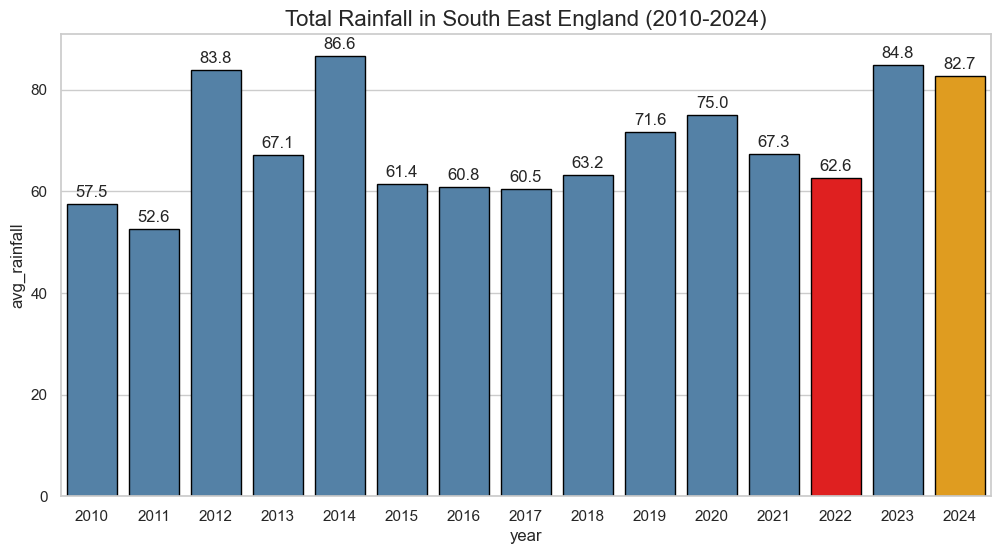

In [8]:
# Calculate the mean total rainfall for the years 2010-2023
# Note: The year 2024 is not included in the mean calculation as we want to compare it with the previous years.
# rainfall_mean = rainfall_se_2010_2024[rainfall_se_2010_2024['year'] < 2024]['total_rainfall'].mean()
rainfall_mean = rainfall_se[(rainfall_se['year'] >= 2010) & (rainfall_se['year']<=2024)]['total_rainfall'].mean()


print("Total Rainfall mean (2010-2023) = {}".format(np.round(rainfall_mean, 2)))

years = sorted(rainfall_se[(rainfall_se['year'] >= 2010) & (rainfall_se['year']<=2024)]['year'].unique())
colors = ['steelblue'] * len(years)

# Set special colors
last_year = max(years)
for i, year in enumerate(years):
    if year == 2022:
        colors[i] = 'red'      # Color for 2022
    elif year == last_year:
        colors[i] = 'orange'   # Color for last year


sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=rainfall_se[(rainfall_se['year'] >= 2010) & (rainfall_se['year']<=2024)],
    x='year',
    y='avg_rainfall',
    hue='year',
    palette=colors,
    edgecolor='black',
    legend=False
    );

# Showing bars values
for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', padding=3)
# plt.axhline(y=rainfall_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {rainfall_mean:.2f}');

plt.title('Total Rainfall in South East England (2010-2024)', fontsize=16);

Starting from this plot, we can make it more general and plot the different features, i.e. total rainfall, mean, median, standard deviation, per year. 

> The plotted mean is refers to all years before the latest one. 

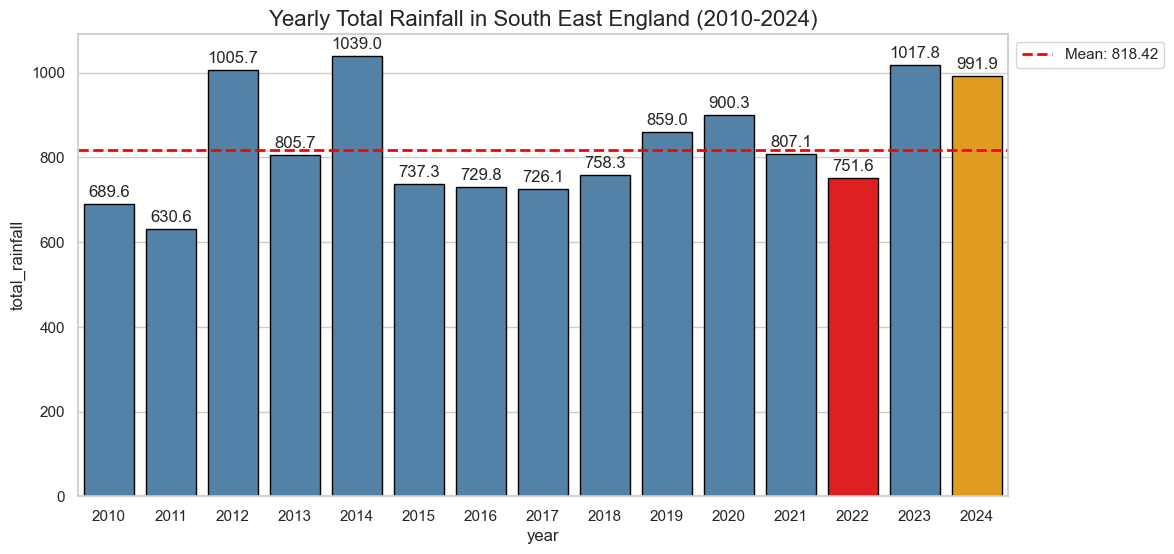

In [9]:
from src.data_plotting import plot_rainfall

start_year = 2010
latest_yaer = 2024

plot_rainfall(rainfall_se, start_year, latest_yaer, feature='total_rainfall', special_year=2022, title_label='Yearly Total Rainfall', year_shift = False)

So, if we are having a look to the first 5 months of 2025, the monthly mean looks actually significantly (I am not saying *is* statistically significantly) lower than the previous year. But one could argue that we are just comparing the first 5 months of the year, it could just be that for the first 5 months of the year, each year, the mean might be lower than the rest of the year. The next step is to compare the first 5 months of each year and see what the mean can tell us. 

In [12]:
months_compare = ['jan', 'feb', 'mar', 'apr', 'may']
rainfall_se_jan_to_may = (rainfall_data_se[rainfall_data_se['month'].isin(months_compare)]
                          .groupby('year')
                          .agg(
                              total_rainfall=('rainfall', 'sum'),
                              avg_rainfall=('rainfall', 'mean'),
                              median_rainfall=('rainfall', 'median'),
                              max_rainfall=('rainfall', 'max'),
                              min_rainfall=('rainfall', 'min')
                              )
                              ).reset_index()

rainfall_se_jan_to_may.head()

,year,total_rainfall,avg_rainfall,median_rainfall,max_rainfall,min_rainfall
0,1836,342.0,68.40,67.7,103.1,21.5
1,1837,240.4,48.08,34.4,81.1,19.8
2,1838,159.9,31.98,28.6,58.1,12.9
3,1839,216.2,43.24,48.6,53.5,25.2
4,1840,202.1,40.42,49.3,87.0,5.0


In [ ]:
def sort_and_highlight_dataframe(df, sort_column, columns_to_display, 
                                 highlight_condition=None, filter_condition=None,
                                 ascending=False, add_rank=True, 
                                 highlight_color='#2d5a87', n_rows=None):
    """
    Sort a dataframe and display selected columns with highlighted rows.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe to sort and display
    sort_column : str
        Column name to sort by
    columns_to_display : list
        List of column names to display in the final output
    highlight_condition : dict or list of dicts, optional
        Dictionary with column name as key and value(s) to highlight
        e.g., {'year': 2024} or {'year': [2024, 2023]}
        For multiple colors, use list of dicts:
        [{'condition': {'year': 2024}, 'color': '#ff0000'},
         {'condition': {'year': 2023}, 'color': '#00ff00'}]
    filter_condition : callable, optional
        Function that takes the dataframe and returns a boolean mask
        e.g., lambda df: (df['year'] >= 2010) & (df['year'] <= 2024)
    ascending : bool, default False
        Sort order (False for descending, True for ascending)
    add_rank : bool, default True
        Whether to add a 'Rank' column based on sort order
    highlight_color : str or dict, default '#2d5a87'
        Background color for highlighted rows. Can be:
        - Single color string (applied to all highlights)
        - Ignored if highlight_condition contains color specifications
    n_rows : int, optional
        Number of top rows to display (None for all rows)
    
    Returns:
    --------
    pandas.io.formats.style.Styler
        Styled dataframe with highlighted rows
    """
    import pandas as pd
    
    # Apply filter condition if provided
    if filter_condition is not None:
        filtered_df = df[filter_condition(df)].copy()
    else:
        filtered_df = df.copy()
    
    # Sort the dataframe
    sorted_df = filtered_df.sort_values(sort_column, ascending=ascending).reset_index(drop=True)
    
    # Find indices to highlight
    highlight_mapping = {}  # index -> color mapping
    
    if highlight_condition is not None:
        # Handle both old format (dict) and new format (list of dicts)
        if isinstance(highlight_condition, dict):
            # Old format - single condition, single color
            if 'condition' in highlight_condition and 'color' in highlight_condition:
                # New format but single item
                conditions = [highlight_condition]
            else:
                # Old format
                conditions = [{'condition': highlight_condition, 'color': highlight_color}]
        elif isinstance(highlight_condition, list):
            # New format - multiple conditions with colors
            conditions = highlight_condition
        else:
            conditions = []
        
        for cond_spec in conditions:
            condition = cond_spec['condition']
            color = cond_spec.get('color', highlight_color)
            
            for col, values in condition.items():
                if not isinstance(values, list):
                    values = [values]
                for value in values:
                    indices = sorted_df[sorted_df[col] == value].index.tolist()
                    for idx in indices:
                        highlight_mapping[idx] = color
    
    # Limit rows if specified
    if n_rows is not None:
        sorted_df = sorted_df.head(n_rows)
        # Filter highlight_mapping to only include visible rows
        highlight_mapping = {k: v for k, v in highlight_mapping.items() if k < n_rows}
    
    # Remove duplicates and sort (not needed anymore since we use highlight_mapping)
    # highlight_indices = sorted(list(set(highlight_indices)))
    
    # Define highlighting function with multiple colors
    def highlight_rows(s):
        if s.name in highlight_mapping:
            return [f'background-color: {highlight_mapping[s.name]}' for _ in s]
        else:
            return ['' for _ in s]
    
    # Apply styling and return
    styled_df = sorted_df[columns_to_display].style.hide(axis='index').apply(highlight_rows, axis=1)
    
    return styled_df

# Example usage function that replicates your original code
def rainfall_analysis_example(rainfall_se):
    """
    Example function showing how to use sort_and_highlight_dataframe 
    with your rainfall data.
    """
    return sort_and_highlight_dataframe(
        df=rainfall_se,
        sort_column='total_rainfall',
        columns_to_display=['year', 'total_rainfall', 'avg_rainfall', 'median_rainfall'],
        highlight_condition={'year': 2024},
        filter_condition=lambda df: (df['year'] >= 2010) & (df['year'] <= 2024),
        ascending=False,
        add_rank=True,
        highlight_color='#2d5a87'
    )


# Alternative simpler function for common use cases
def quick_sort_highlight(df, sort_by, show_cols, highlight_year=None, top_n=None):
    """
    Simplified version for quick sorting and highlighting by year.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    sort_by : str
        Column to sort by
    show_cols : list
        Columns to display
    highlight_year : int, optional
        Year to highlight
    top_n : int, optional
        Number of top rows to show
    """
    highlight_condition = {'year': highlight_year} if highlight_year else None
    
    return sort_and_highlight_dataframe(
        df=df,
        sort_column=sort_by,
        columns_to_display=show_cols,
        highlight_condition=highlight_condition,
        ascending=False,
        add_rank=True,
        n_rows=top_n
    )

In [ ]:
def sort_and_highlight_dataframe(df, sort_column, columns_to_display, 
                                 highlight_condition=None, filter_condition=None,
                                 ascending=False, add_rank=True, 
                                 highlight_color='#2d5a87', n_rows=None):
    """
    Sort a dataframe and display selected columns with highlighted rows.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe to sort and display
    sort_column : str
        Column name to sort by
    columns_to_display : list
        List of column names to display in the final output
    highlight_condition : dict or list of dicts, optional
        Dictionary with column name as key and value(s) to highlight
        e.g., {'year': 2024} or {'year': [2024, 2023]}
        For multiple colors, use list of dicts:
        [{'condition': {'year': 2024}, 'color': '#ff0000'},
         {'condition': {'year': 2023}, 'color': '#00ff00'}]
    filter_condition : callable, optional
        Function that takes the dataframe and returns a boolean mask
        e.g., lambda df: (df['year'] >= 2010) & (df['year'] <= 2024)
    ascending : bool, default False
        Sort order (False for descending, True for ascending)
    add_rank : bool, default True
        Whether to add a 'Rank' column based on sort order
    highlight_color : str or dict, default '#2d5a87'
        Background color for highlighted rows. Can be:
        - Single color string (applied to all highlights)
        - Ignored if highlight_condition contains color specifications
    n_rows : int, optional
        Number of top rows to display (None for all rows)
    
    Returns:
    --------
    pandas.io.formats.style.Styler
        Styled dataframe with highlighted rows
    """
    import pandas as pd
    
    # Apply filter condition if provided
    if filter_condition is not None:
        filtered_df = df[filter_condition(df)].copy()
    else:
        filtered_df = df.copy()
    
    # Sort the dataframe
    sorted_df = filtered_df.sort_values(sort_column, ascending=ascending).reset_index(drop=True)
    
    # Find indices to highlight
    highlight_mapping = {}  # index -> color mapping
    
    if highlight_condition is not None:
        # Handle both old format (dict) and new format (list of dicts)
        if isinstance(highlight_condition, dict):
            # Old format - single condition, single color
            if 'condition' in highlight_condition and 'color' in highlight_condition:
                # New format but single item
                conditions = [highlight_condition]
            else:
                # Old format
                conditions = [{'condition': highlight_condition, 'color': highlight_color}]
        elif isinstance(highlight_condition, list):
            # New format - multiple conditions with colors
            conditions = highlight_condition
        else:
            conditions = []
        
        for cond_spec in conditions:
            condition = cond_spec['condition']
            color = cond_spec.get('color', highlight_color)
            
            for col, values in condition.items():
                if not isinstance(values, list):
                    values = [values]
                for value in values:
                    indices = sorted_df[sorted_df[col] == value].index.tolist()
                    for idx in indices:
                        highlight_mapping[idx] = color
    
    # Limit rows if specified
    if n_rows is not None:
        sorted_df = sorted_df.head(n_rows)
        # Filter highlight_mapping to only include visible rows
        highlight_mapping = {k: v for k, v in highlight_mapping.items() if k < n_rows}
    
    # Remove duplicates and sort (not needed anymore since we use highlight_mapping)
    # highlight_indices = sorted(list(set(highlight_indices)))
    
    # Define highlighting function with multiple colors
    def highlight_rows(s):
        if s.name in highlight_mapping:
            return [f'background-color: {highlight_mapping[s.name]}' for _ in s]
        else:
            return ['' for _ in s]
    
    # Apply styling and return
    styled_df = sorted_df[columns_to_display].style.hide(axis='index').apply(highlight_rows, axis=1)
    
    return styled_df


# Example usage with multiple colors
def rainfall_analysis_multicolor_example(rainfall_se):
    """
    Example showing multiple highlight colors.
    """
    return sort_and_highlight_dataframe(
        df=rainfall_se,
        sort_column='total_rainfall',
        columns_to_display=['year', 'total_rainfall', 'avg_rainfall', 'median_rainfall'],
        highlight_condition=[
            {'condition': {'year': 2024}, 'color': '#ff4444'},  # Red for 2024
            {'condition': {'year': 2023}, 'color': '#44ff44'},  # Green for 2023
            {'condition': {'year': 2022}, 'color': '#4444ff'}   # Blue for 2022
        ],
        filter_condition=lambda df: (df['year'] >= 2010) & (df['year'] <= 2024),
        ascending=False,
        add_rank=True
    )


# Alternative simpler function for common use cases
def quick_sort_highlight(df, sort_by, show_cols, highlight_year=None, top_n=None):
    """
    Simplified version for quick sorting and highlighting by year.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    sort_by : str
        Column to sort by
    show_cols : list
        Columns to display
    highlight_year : int, optional
        Year to highlight
    top_n : int, optional
        Number of top rows to show
    """
    highlight_condition = {'year': highlight_year} if highlight_year else None
    
    return sort_and_highlight_dataframe(
        df=df,
        sort_column=sort_by,
        columns_to_display=show_cols,
        highlight_condition=highlight_condition,
        ascending=False,
        add_rank=True,
        n_rows=top_n
    )

# Example usage with multiple colors
def rainfall_analysis_multicolor_example(rainfall_se):
    """
    Example showing multiple highlight colors.
    """
    return sort_and_highlight_dataframe(
        df=rainfall_se,
        sort_column='total_rainfall',
        columns_to_display=['year', 'total_rainfall', 'avg_rainfall', 'median_rainfall'],
        highlight_condition=[
            {'condition': {'year': 2024}, 'color': '#ff4444'},  # Red for 2024
            {'condition': {'year': 2023}, 'color': '#44ff44'},  # Green for 2023
            {'condition': {'year': 2022}, 'color': '#4444ff'}   # Blue for 2022
        ],
        filter_condition=lambda df: (df['year'] >= 2010) & (df['year'] <= 2024),
        ascending=False,
        add_rank=True
    )


# # Alternative simpler function for common use cases
def quick_sort_highlight(df, sort_by, show_cols, highlight_year=None, top_n=None):
    """
    Simplified version for quick sorting and highlighting by year.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe
    sort_by : str
        Column to sort by
    show_cols : list
        Columns to display
    highlight_year : int, optional
        Year to highlight
    top_n : int, optional
        Number of top rows to show
    """
    highlight_condition = {'year': highlight_year} if highlight_year else None
    
    return sort_and_highlight_dataframe(
        df=df,
        sort_column=sort_by,
        columns_to_display=show_cols,
        highlight_condition=highlight_condition,
        ascending=False,
        add_rank=True,
        n_rows=top_n
    )